In [31]:
# Importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import astropy.constants as c
from astropy.modeling.models import BlackBody

# Section 2: Distances, Magnitudes, and the Hertzsprung-Russell Diagram

<div class="alert alert-block alert-success">
    <b> Key Question </b>

How do we measure the distances to stars, and define how bright stars are? Once we know these parameters, what can they tell us about the structure of our Galaxy, and the hierarchy of stars?
</div>

## The distance and brightness of stars

**Relevant Literature**: Chapter 3.1 of Carroll and Ostlie

The most direct method of measuring the distance to a star is to measure its parallax. Consider a nearby star which is a distance D from the Sun. Over a half a year, it's position on the sky will vary relative to the background of stars which are far enough away that they don't show any motion.

![Parallax](Figures/Parallax.png)

The Earth lies 1 astronomical unit (1 AU $=1.49\times10^{11}$ m) away from the Sun. As such, an object which exhibits a parallax of $\theta=1"$ has to be a distance
$$
    D = \frac{1.49\times10^{11} \: {\rm m}}{\tan(\theta)} \approx \frac{1.49\times10^{11} \: {\rm m}}{\theta} = 3.0856\times10^{16}{\rm m} \equiv 1 {\rm pc}
$$

In [2]:
theta = 1*u.arcsec
D=1*u.au/np.tan(theta)
D.to(u.m)

<Quantity 3.08567758e+16 m>

Alternatively, 

$$
    D = \frac{1}{\theta}
$$

when $\theta$ is given in arcseconds, and D will be given in parsecs.

Note that the nearest star to Earth, Proxima Centauri, is 1.3 parsecs away. This means the observed parallax is less than 1". This is a very small angle, smaller than the average seeing from an observing site (where seeing is the dispersion of starlight by atmospheric turbulence.)

A parallax measurement of 0.1-0.01" can be done from the ground under exceptional observing conditions, but this only gets us out to a distance of 100 pc. Considering the Milky Way is 32kpc across, this is barely scratching the surface. As such, we need to get above the atmosphere to observe smaller parallaxes.

<div class="alert alert-block alert-info">
    <b>Example: Stars on the far side of the Milky Way</b>

The furthest star from Earth in the Milk way is roughly 24kpc away. How sensitive would a telescope need to be to measure the parallax of this object?
    
$$
\theta=\frac{1}{24000}=4\times10^{-5}"
$$
    
For reference, GAIA is a space telescope which has achieved parallax measurements of $(1\times10^{-4})$". As such, it is capable of constraining the distances of objects which are up to 10 kpc away.
</div>

## Flux and Magnitudes

**Relevant Literature**: Chapter 3.2 of Carroll and Ostlie

### Apparent Magnitude
The term apparent magnitude comes from Hipparchus, who catalogued the visible stars. He assigned the brightest stars a magnitude of 1, and the faintest stars as a magnitude of 6. So, what does a magnitude actually represent?

Assume we know the distance, $D$, to a star that has an intrinsic luminosity, $L$. This luminosity will be spread over the surface area of an sphere, so the flux, $F$ a telescope at Earth will measure is given by
$$
    F=\frac{L}{4 \pi D^2}
$$
Normally astronomers don't quote fluxes, but instead work in magnitudes. The conversion is
$$
    m=-2.5\log_{10}\left(\frac{F}{C}\right)
$$
where C is a normalising constant. Now, consider an an object which is 100 brighter than another object ($F_2=100F_1$). If we calculate $m_1-m_2$, we find that it is 5. This means that an object which is 100 times brighter will have a magnitude which is 5 less - the magnitude system is an inverted scale (the more positive a magnitude is, the fainter it is).

The Sun has a magnitude of -27, while the faintest objects observable in the night sky have a magnitude of $\sim$ +30. The naked eye can see as faint as magnitude $+6$ if conditions are exceptional. **Apparent magnitudes** are typically written as $m$.


### Absolute Magnitude

A useful quantity that can be derived using the above equation is the absolute magnitude of a source, which typically written as $M$. This is the magnitude a source would have if it were at a distance of 10 pc from the Sun. To calculate what $M$ is, we use:
$$
    m-M=-2.5\log_{10}\left(\frac{F}{C}\right)+2.5\log_{10}\left(\frac{F_{10}}{C}\right)
$$
where $F_{10}$ is the flux we would see if the object were at 10pc. This simplifies to
$$
    m-M=-2.5\log_{10}\left(\frac{F}{F_{10}}\right)
$$
Finally, remembering that $F=\frac{L}{4 \pi D^2}$, so $F_{10}=\frac{L}{4 \pi 10^2}$, we can simplify this further to
$$
    m-M=5\log_{10}\left(\frac{D ({\rm pc})}{10 ({\rm pc})}\right)
$$
So, if we know the distance to a source and its apparent magnitude, we can immediately calculate its absolute magnitude.

<div class="alert alert-block alert-info">
    <b>Example: Apparent magnitude of the Sun</b>
    
The Sun has an apparent magnitude of -26.74, and lies $1.49\times10^{11}$ m ($=4.848\times10^{-6}$ pc) from Earth. What is it's absolute magnitude?
    
Using the above formula, we find
$$
    -26.74-M=5\log_{10}\left(\frac{4.848\times10^{-6}}{10}\right)\\
    M=4.83
$$
</div>

### Observing Filters

Before going any further, we need to discuss the constant in the equation.
$$
    m=-2.5\log_{10}\left(\frac{F}{C}\right)
$$

If we measued the flux ($F=\int_0^{\infty} F_{\rm \lambda} d\lambda$) coming from a star across the entire electromagnetic spectrum, the magnitudes we calculate are called **bolometric magnitudes**. However, stars are typically observed using different filters, which cover different parts of the spectrum. The below figure shows the sensitivity curves ($S$) for the SDSS (Sloan Digital Sky Survey) filters.

![SDSS_filters](Figures/Response_Curves.png)

These transmission curves tell us which part of the spectrum we are sensitive too when using them. For example, when using the $u$ filter, we are sensitive to light from $\sim 3000-4000$ Å. 

As such, the u-band magnitude of the source, $m_u \equiv u$, is given by 

$$
    u=-2.5\log_{10}\left(\frac{\int_0^{\infty} S_u F_{\rm \lambda} d\lambda}{C_u}\right)\\
    u=-2.5\log_{10}\left(\int_0^{\infty} S_u F_{\rm \lambda} d\lambda\right)+C_u
$$

Here, $C_u$ is a constant for the u band filter. Similar constants ($C_g$,$C_r$,$C_i$,$C_z$) exist for each band ($g$,$r$,$i$,$z$). For the **AB** system, which SDSS uses, the constants are chosen such that a star with magnitude 0 has a flux density of 3.631$\times10^{-20}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$. In Carroll and Ostlie, they use the Johnson set of filters. For this system, the constants use the **Vega** system, in which Vega has a magnitude of 0 in each band.

If the distance to the source is known, and $m_u$ measured, then the absolute magnitude in the u-band $M_u$ can be calculated.

### Colours

Consider a blackbody which is observed using the same filters as above, and which we know the distance to. Each filter is sensitive to a different part of the spectrum, meaning the same source will appear with different fluxes in each band. The different in absolute magnitudes between the g and i bands will be
$$
    g-i=-2.5\log_{10}\frac{F_{\rm g} C_{\rm i}}{F_{\rm i} C_{\rm g}}
$$
where the $C$s in the above equation are the normalising constants for each band above, and for simplicity we have let $F_g= \int_0^{\infty} S_g F_{\rm \lambda} d\lambda$ etc. This means 
$$
    g-i = -2.5\log_{10}\frac{F_{\rm g}}{F_{\rm i}} + C_{\rm g-i}
$$
where $C_{\rm g-i}=C_{\rm g}-C_{\rm i}$

So, imagine we can measure both $m_{\rm u}$ and $m_{\rm r}$ for a bunch of stars. What does this tell us? Consider the code below. It produces two Figures - one with a blackbody of temperature 5000 kelvin and one with a temperature of 8000 kelvin.

The blackbody spectrum is initially computed using
$$
    B_\nu(T)=\frac{2h \nu^3/c^2}{\exp(h\nu /kt)-1}
$$
This is given as a function of frequency, $\nu$. In optical astronomy, we typically talk in wavelengths, $\lambda$, and so this formula needs converting. (You should have done this in second year). After conversion, the formula is:
$$
    B_\lambda(T)=\frac{2hc^2/\lambda^5}{\exp(hc/\lambda kt)-1}
$$

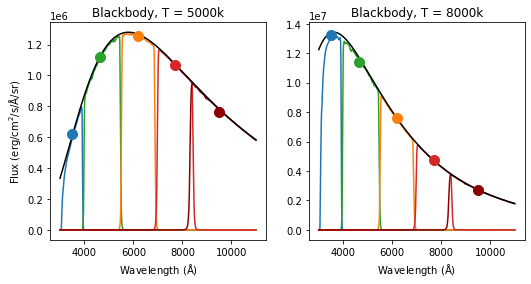

In [32]:
#The following lines read in the response curves

u_filter = np.genfromtxt("resources/u_filter_response.txt")
g_filter = np.genfromtxt("resources/g_filter_response.txt")
r_filter = np.genfromtxt("resources/r_filter_response.txt")
i_filter = np.genfromtxt("resources/i_filter_response.txt")
z_filter = np.genfromtxt("resources/z_filter_response.txt")

# The following is a convenince function that numerically integrates
# the blackbody flux (bb) over a given response file (filt)
def integrate_bb(bb,filt):
    flux_density = filt[:,1]*bb(filt[:,0]*u.AA)
    flux_density = flux_density.to(u.erg/u.cm**2/u.s/u.AA/u.sr, equivalencies=u.spectral_density(filt[:,0]*u.AA))
    flux = 0
    response = 0
    wav = np.abs(np.diff(filt[:,0]))
    for i,j in enumerate(wav):
        flux += (flux_density[i]+flux_density[i+1])/2*j
        response += (filt[i,1]+filt[i+1,1])/2*j
    return flux/response

# Defining a blackbody curve over the wavelength range of our filters
bb = BlackBody(temperature=5000*u.K)
wav = u_filter[:,0] * u.AA
flux_bb_5000k = bb(wav)
# Note that the below conversion moves from per Hertz to per Angstrom
# You should remember why this is necessary from second year!
flux_bb_5000k = flux_bb_5000k.to(u.erg/u.cm**2/u.s/u.AA/u.sr, equivalencies=u.spectral_density(wav))

#Calculating the fluxes in each band
u_flux_5000k = integrate_bb(bb,u_filter)
g_flux_5000k = integrate_bb(bb,g_filter)
r_flux_5000k = integrate_bb(bb,r_filter)
i_flux_5000k = integrate_bb(bb,i_filter)
z_flux_5000k = integrate_bb(bb,z_filter)

# Defining a blackbody curve over the wavelength range of our filters
bb = BlackBody(temperature=8000*u.K)
wav = u_filter[:,0] * u.AA
flux_bb_8000k = bb(wav)
# Note that the below conversion moves from per Hertz to per Angstrom
# You should remember why this is necessary from second year!
flux_bb_8000k = flux_bb_8000k.to(u.erg/u.cm**2/u.s/u.AA/u.sr, equivalencies=u.spectral_density(wav))

#Calculating the fluxes in each band
u_flux_8000k = integrate_bb(bb,u_filter)
g_flux_8000k = integrate_bb(bb,g_filter)
r_flux_8000k = integrate_bb(bb,r_filter)
i_flux_8000k = integrate_bb(bb,i_filter)
z_flux_8000k = integrate_bb(bb,z_filter)

#Making the plot
fig,ax = plt.subplots(1,2,figsize=[8.5,4])
ax[0].plot(u_filter[:,0],u_filter[:,1]*flux_bb_5000k,'C0')
ax[0].plot(3500,u_flux_5000k,'C0.',zorder=99,markersize=20)
ax[0].plot(g_filter[:,0],g_filter[:,1]*flux_bb_5000k,'C2')
ax[0].plot(4650,g_flux_5000k,'C2.',zorder=99,markersize=20)
ax[0].plot(r_filter[:,0],r_filter[:,1]*flux_bb_5000k,'C1')
ax[0].plot(6200,r_flux_5000k,'C1.',zorder=99,markersize=20)
ax[0].plot(i_filter[:,0],i_filter[:,1]*flux_bb_5000k,'C3')
ax[0].plot(7700,i_flux_5000k,'C3.',zorder=99,markersize=20)
ax[0].plot(z_filter[:,0],z_filter[:,1]*flux_bb_5000k,'darkred')
ax[0].plot(9500,z_flux_5000k,'.',color='darkred',zorder=99,markersize=20)
ax[0].set_ylabel(r"Flux (erg/cm$^2$/s/${\rm \AA}$/sr)")
ax[0].set_xlabel(r"Wavelength ($\rm \AA$)")
ax[0].plot(wav,flux_bb_5000k,'k')
ax[0].set_title("Blackbody, T = 5000k")

ax[1].plot(u_filter[:,0],u_filter[:,1]*flux_bb_8000k,'C0')
ax[1].plot(3500,u_flux_8000k,'C0.',zorder=99,markersize=20)
ax[1].plot(g_filter[:,0],g_filter[:,1]*flux_bb_8000k,'C2')
ax[1].plot(4650,g_flux_8000k,'C2.',zorder=99,markersize=20)
ax[1].plot(r_filter[:,0],r_filter[:,1]*flux_bb_8000k,'C1')
ax[1].plot(6200,r_flux_8000k,'C1.',zorder=99,markersize=20)
ax[1].plot(i_filter[:,0],i_filter[:,1]*flux_bb_8000k,'C3')
ax[1].plot(7700,i_flux_8000k,'C3.',zorder=99,markersize=20)
ax[1].plot(z_filter[:,0],z_filter[:,1]*flux_bb_8000k,'darkred')
ax[1].plot(9500,z_flux_8000k,'.',color='darkred',zorder=99,markersize=20)
#ax[1].set_ylabel(r"Flux (erg/cm$^2$/s/${\rm \AA}$/sr)")
ax[1].set_xlabel(r"Wavelength ($\rm \AA$)")
ax[1].plot(wav,flux_bb_8000k,'k')
ax[1].set_title("Blackbody, T = 8000k")
plt.savefig("Images/Blackbody_SDSS.jpg")
plt.show()

In the case of 5000 K star, $\frac{F_{\rm g}}{F_{\rm i}}$=1.047, and $g-i$=-0.05 (ignoring the constants). For the 8000 K star, $\frac{F_{\rm g}}{F_{\rm i}}$=2.46, and $g-i$=-0.95. So immediately, this tells us that if we can measure $g$ and $i$ (or another combination of colours), then we can estimate the temperature of the star, and that hotter stars have more negative $g-i$ values.

<div class="alert alert-block alert-warning">
<b>It is common to write $m_{\rm g}$ as $g$, or $m_{\rm i}$ as i.</b>
If you are observing in the Johnson Filters, which are U, B, V, R, and I, then $m_{\rm U}$ is written as $U$, $m_{\rm V}$ as $V$ etc. This means the colour could be given by $B-V$ etc. This is how Section 3.6 of Carroll writes everything.
</div>

## The Hertzsprung Russell Diagram

Combining these pieces of information (distance and colour) for every object allows us to make a plot of **absolute magnitude** versus **colour**. This plot is known as the Hertzsprung Russell diagram. Hot objects are to the left, cool objects to the right. Very luminous (and thus big) objects are towards the top, and intrinsically faint objects (and thus small physically) are towards the bottom. The colour of the points represents the number density - so there are a lot of objects in the yellow-green regions, and fewer objects in the blue regions.


![HR_diagram](Figures/gaia-hrd-dr2.png)